### 주성분 분석(PCA : Principal Component Analysis)
- 고차원의 데이터를 저차원의 데이터로 환원시키는 기법

In [7]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
import numpy as np
fruits = np.load('../Data/fruits.npy')

In [9]:
fruits_2d = fruits.reshape(-1,100*100)

In [10]:
fruits_2d.shape

(300, 10000)

---
### PCA 모델 구성하기

In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50) # 300개의 데이터중 구별이 확실한 주성부분석 샘플 50개를 선택하겠다. 
pca.fit(fruits_2d)

PCA(n_components=50)

In [12]:
pca.components_.shape # 50개만 들어가있는 것을 확인 할 수 있다. 

(50, 10000)

In [13]:
def draw_fruits(arr, ratio=1):
    n = len(arr) # n : 샘플 개수
    # 한줄에 10개씩 이미지를 그린다. 샘플 갯수를 10으로 나누어 전체 행 갯수를 계산
    rows = int(np.ceil(n/10))
    # 행이 1개이면 열 갯수는 샘플 갯수이고, 그렇지 않으면 10개 이다.
    cols = n if rows < 2 else 10

    fig , axs = plt.subplots(rows, cols , figsize=(cols * ratio , rows * ratio) , squeeze= False)

    for i in range(rows):
        for j in range(cols):
            if i * 10 + j < n:
                axs[i,j].imshow(arr[i*10 + j], cmap = 'gray_r')
            axs[i,j].axis('off')
    
    plt.show()

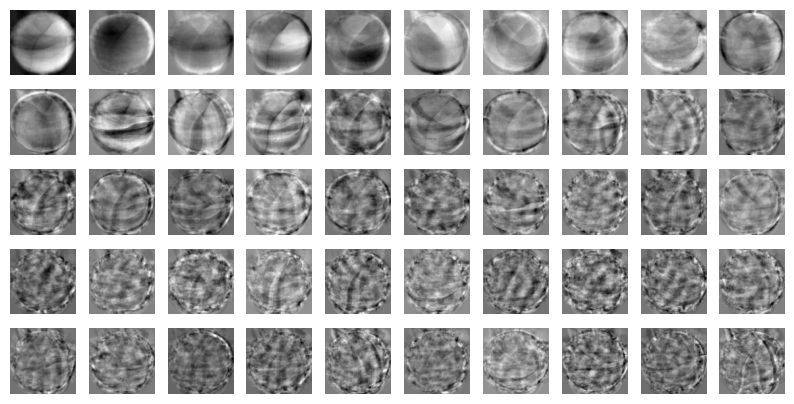

In [14]:
# 50개로 줄인 pca.componets_ 그래프 확인하기
import matplotlib.pyplot as plt

draw_fruits(pca.components_.reshape(-1,100,100))

In [15]:
# 행의 갯수는 원본과 동일하게 하고 Feature의 특성을 50개의 주성분으로 변경하기
fruits_pca = pca.transform(fruits_2d)
fruits_pca.shape

(300, 50)

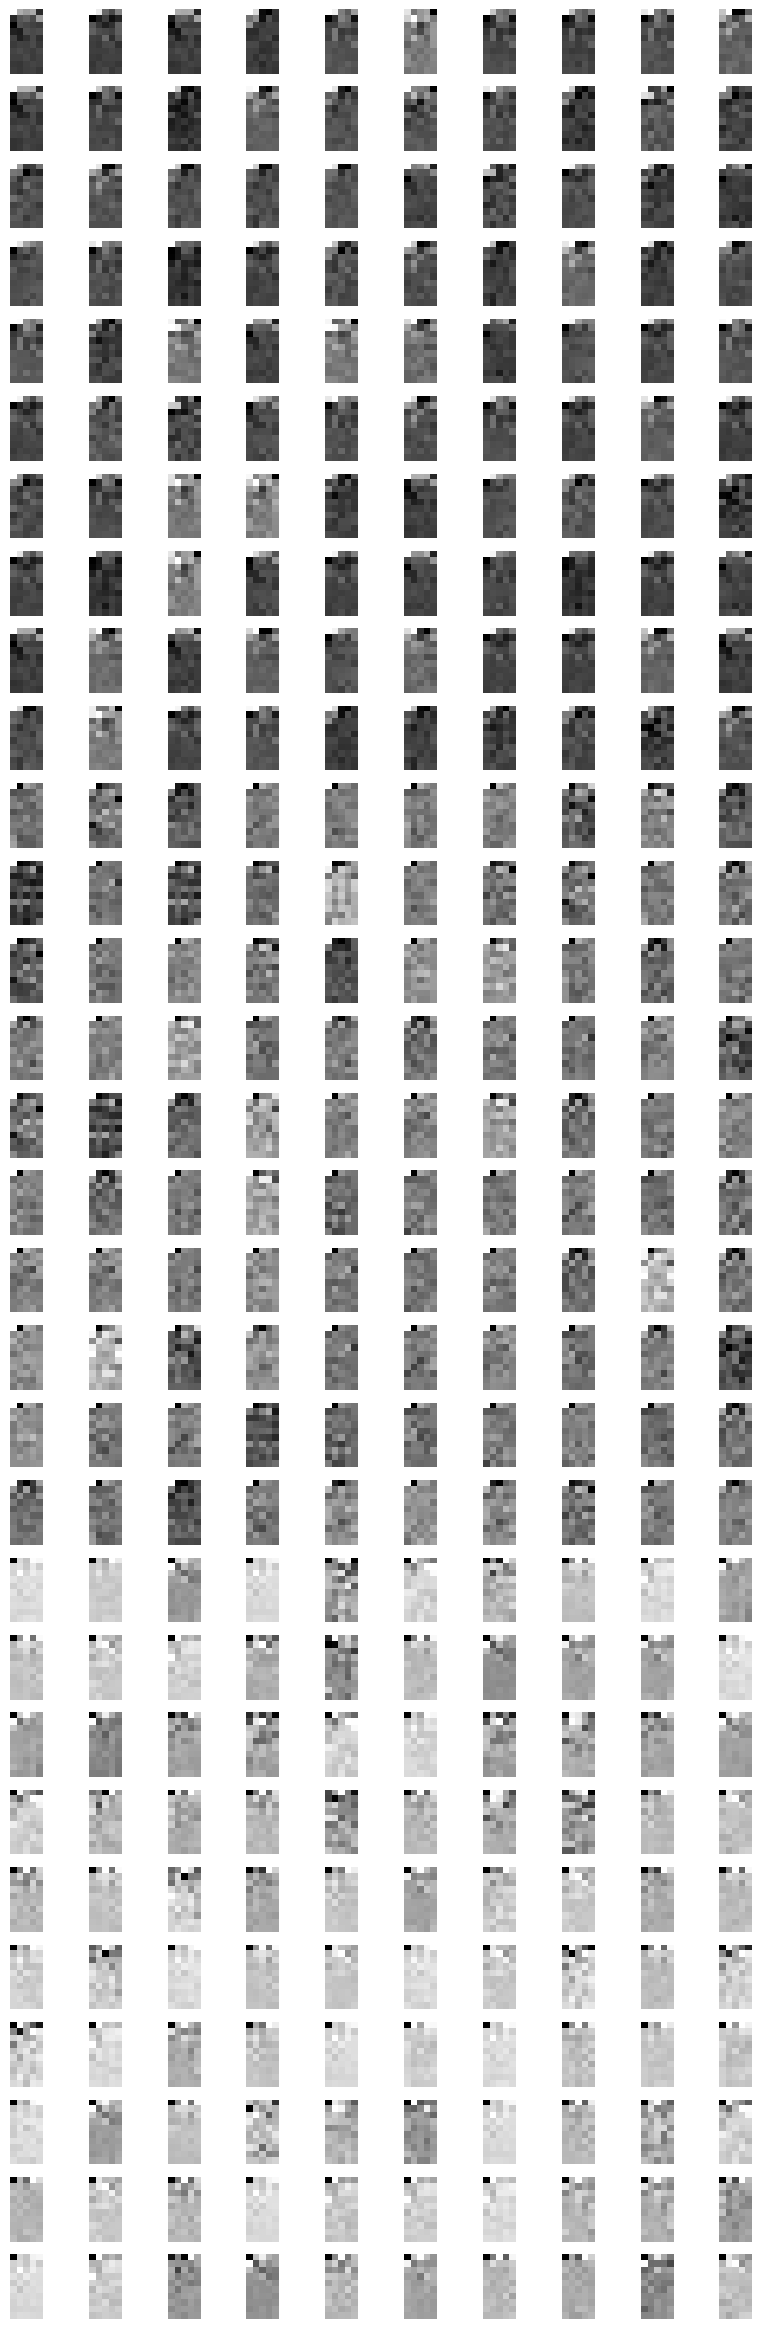

In [16]:
draw_fruits(fruits_pca.reshape(-1,10,5))

---
### 원본 데이터 재구성

In [17]:
# 50개로 줄어든 특성을 가지고 다시 원래 크기로 돌려놨다. 
fruits_inverse = pca.inverse_transform(fruits_pca)
fruits_inverse.shape

(300, 10000)

In [18]:
# 그림을 그리기 위해 2차원 확장
fruits_reconstruct = fruits_inverse.reshape(-1,100,100)
fruits_reconstruct.shape

(300, 100, 100)

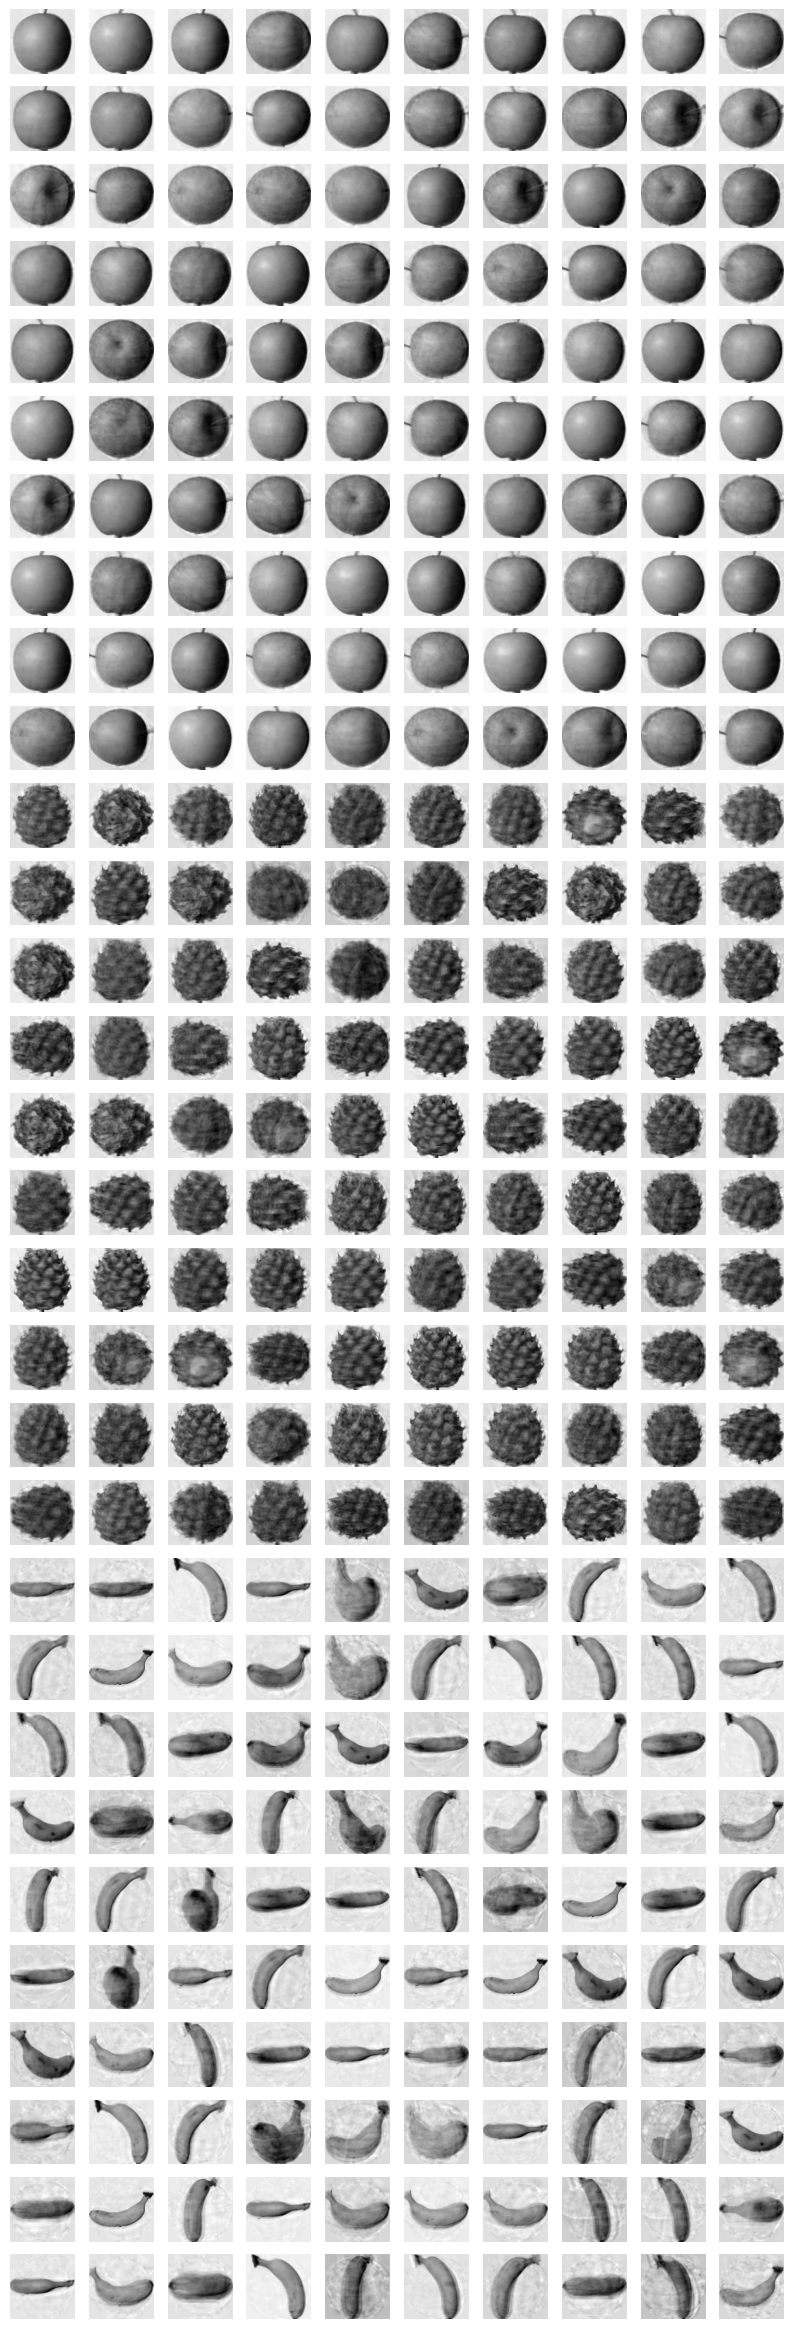

In [19]:
draw_fruits(fruits_reconstruct)

### 1 / 200 의 데어터 특성만 가지고도 전반적으로 배경은 깨끗하지 않으나 물체의 구분은 가능하다.

In [20]:
# 복원 능력
np.sum(pca.explained_variance_ratio_)

0.9222981311632136

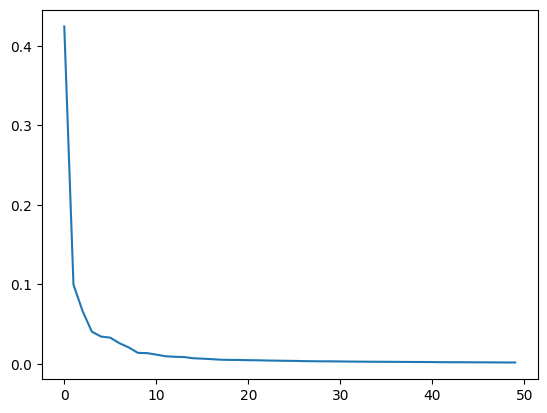

In [21]:
plt.plot(pca.explained_variance_ratio_)

> 10개만 주성분으로 잡아도 문제 없을 것 같아 보인다.

In [22]:
pca10 = PCA(n_components=10)
pca10.fit(fruits_2d)

PCA(n_components=10)

In [23]:
fruits_pca10 = pca10.transform(fruits_2d)


In [24]:
fruits_inverse_10 = pca10.inverse_transform(fruits_pca10)

In [25]:
fruits_reconstruct_10 = fruits_inverse_10.reshape(-1,100,100)

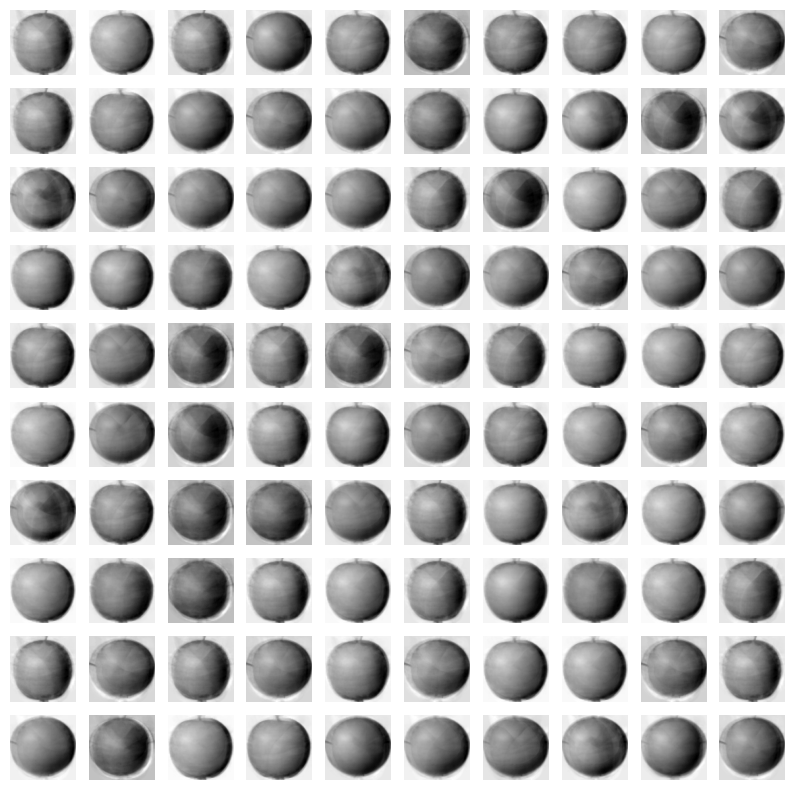

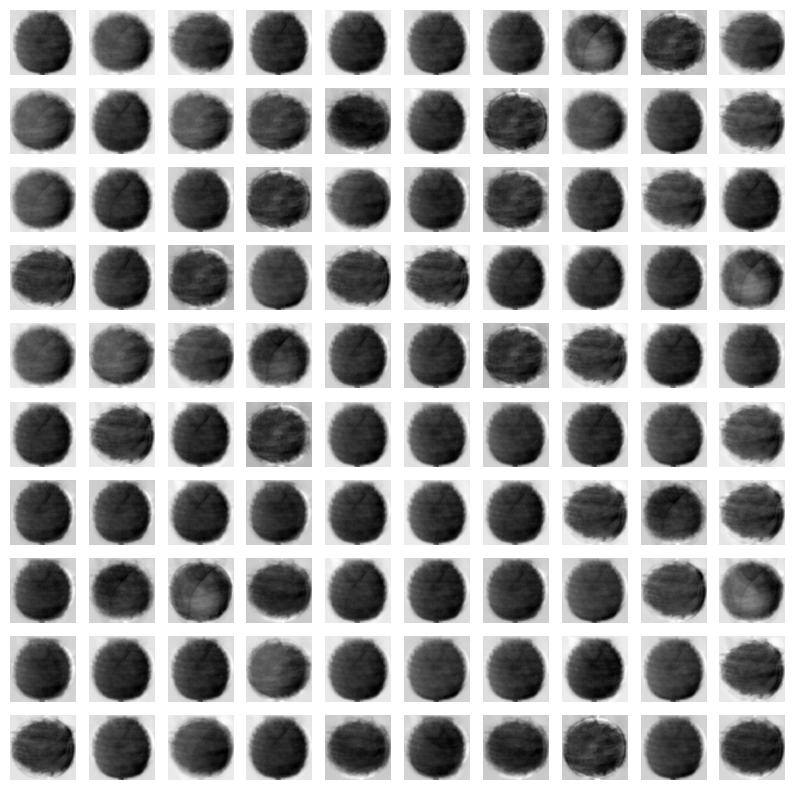

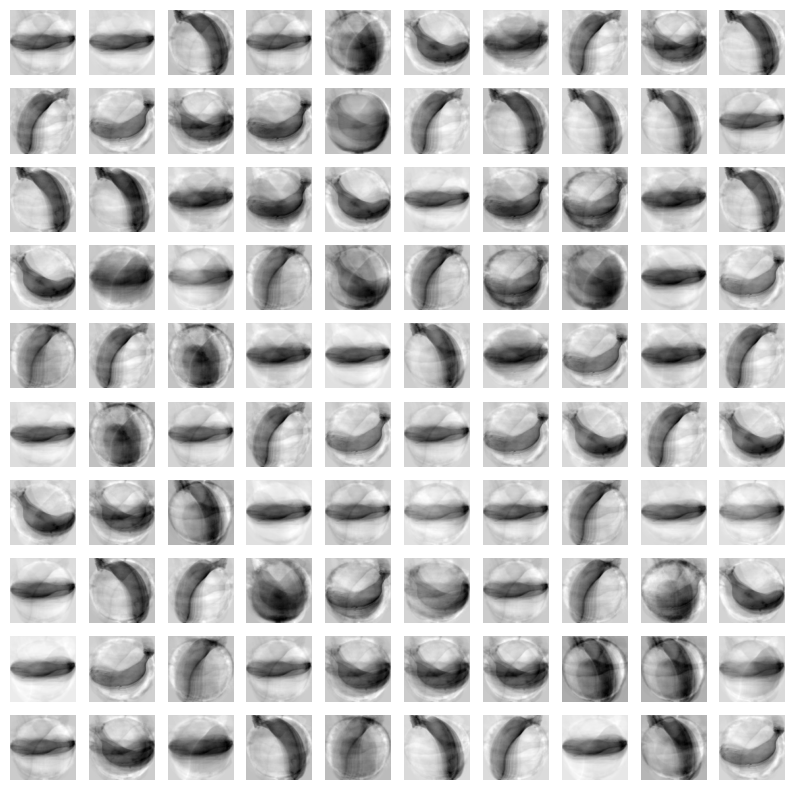

In [26]:
for start in [0,100,200]:
    draw_fruits(fruits_reconstruct_10[start:start+100])

In [27]:
np.sum(pca10.explained_variance_ratio_)

0.7711096082639235

### 로지스틱 회귀분석에 주성분 분석을 대입시켜 사용해 보기

In [28]:
from sklearn.linear_model import LogisticRegression
import time
lr = LogisticRegression()

In [29]:
# 로지스틱 회귀분석을 위해 target data 만들어 주기
target = np.array([0]*100 + [1]*100 + [2]*100)

In [30]:
# 교차 검증을 통해 실시
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

In [31]:
# 모든 데이터 넣고 확인 하기
scores = cross_validate(
    lr,
    fruits_2d,
    target,
    return_train_score=True
)

print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
0.321913480758667


In [32]:
# 주성분 분석한 컬럼 넣기
scores = cross_validate(
    lr,
    fruits_pca10,
    target,
    return_train_score=True
)

print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

1.0
0.004342508316040039
